# Cluster Analysis

Cluster analysis seeks to partition the input data into groups of closely related instances so that instances that belong to the same cluster are more similar to each other than to instances that belong to other clusters. In this tutorial, we will provide examples of using different clustering techniques provided by the scikit-learn library package.

## 1 Hierarchical Clustering

This section demonstrates examples of applying hierarchical clustering to the vertebrate dataset used in Module 6 (Classification). Specifically, we illustrate the results of using 3 hierarchical clustering algorithms provided by the Python scipy library: (1) single link (MIN), (2) complete link (MAX), and (3) group average. Other hierarchical clustering algorithms provided by the library include centroid-based and Ward's method.

In [32]:
import pandas as pd
data = pd.read_csv('vertebrate.csv',header='infer')
data

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,human,1,1,0,0,1,0,mammals
1,python,0,0,0,0,0,1,reptiles
2,salmon,0,0,1,0,0,0,fishes
3,whale,1,1,1,0,0,0,mammals
4,frog,0,0,1,0,1,1,amphibians
5,komodo,0,0,0,0,1,0,reptiles
6,bat,1,1,0,1,1,1,mammals
7,pigeon,1,0,0,1,1,0,birds
8,cat,1,1,0,0,1,0,mammals
9,leopard shark,0,1,1,0,0,0,fishes


In [33]:
from sklearn.metrics import pairwise_distances
# Load your data
data = pd.read_csv('vertebrate.csv', header='infer')

# Extract numerical columns (you might need to adjust the column selection)
numerical_data = data.select_dtypes(include='number')

# Compute Euclidean distance matrix
distance_matrix = pairwise_distances(numerical_data, metric='euclidean')

# Convert the distance matrix to a DataFrame
distance_df = pd.DataFrame(distance_matrix, columns=numerical_data.index, index=numerical_data.index)

print(distance_df)

          0         1         2         3         4         5         6   \
0   0.000000  2.000000  2.000000  1.414214  2.000000  1.414214  1.414214   
1   2.000000  0.000000  1.414214  2.000000  1.414214  1.414214  2.000000   
2   2.000000  1.414214  0.000000  1.414214  1.414214  1.414214  2.449490   
3   1.414214  2.000000  1.414214  0.000000  2.000000  2.000000  2.000000   
4   2.000000  1.414214  1.414214  2.000000  0.000000  1.414214  2.000000   
5   1.414214  1.414214  1.414214  2.000000  1.414214  0.000000  2.000000   
6   1.414214  2.000000  2.449490  2.000000  2.000000  2.000000  0.000000   
7   1.414214  2.000000  2.000000  2.000000  2.000000  1.414214  1.414214   
8   0.000000  2.000000  2.000000  1.414214  2.000000  1.414214  1.414214   
9   1.732051  1.732051  1.000000  1.000000  1.732051  1.732051  2.236068   
10  1.732051  1.732051  1.000000  1.732051  1.000000  1.000000  2.236068   
11  1.414214  2.000000  1.414214  1.414214  1.414214  1.414214  2.000000   
12  1.000000

### 2.1 Single Link (MIN)

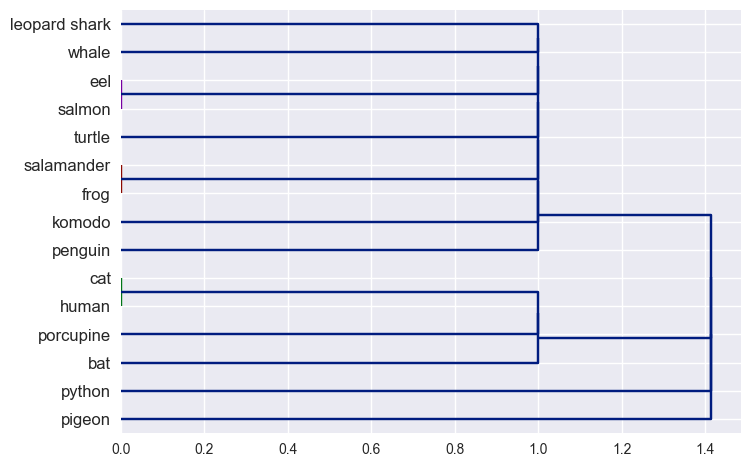

In [34]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
%matplotlib inline

names = data['Name']
Y = data['Class']
X = data.drop(['Name','Class'],axis=1)
Z = hierarchy.linkage(X.values, 'single')
dn = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')

### 2.2 Complete Link (MAX)

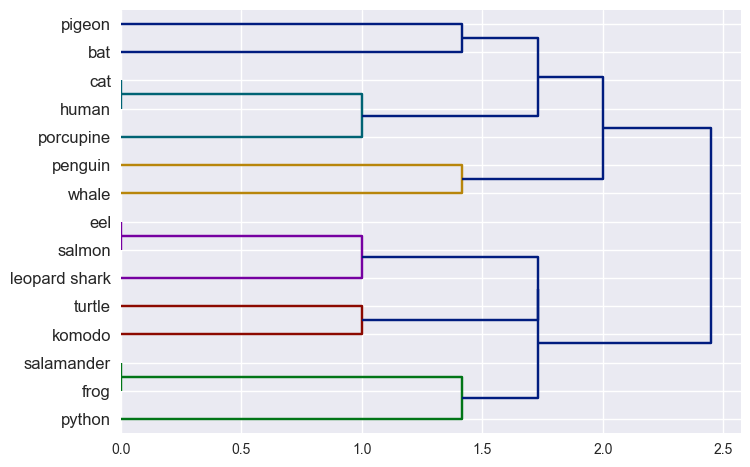

In [35]:
Z = hierarchy.linkage(X.values, 'complete')
dn = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')

### 2.3 Group Average

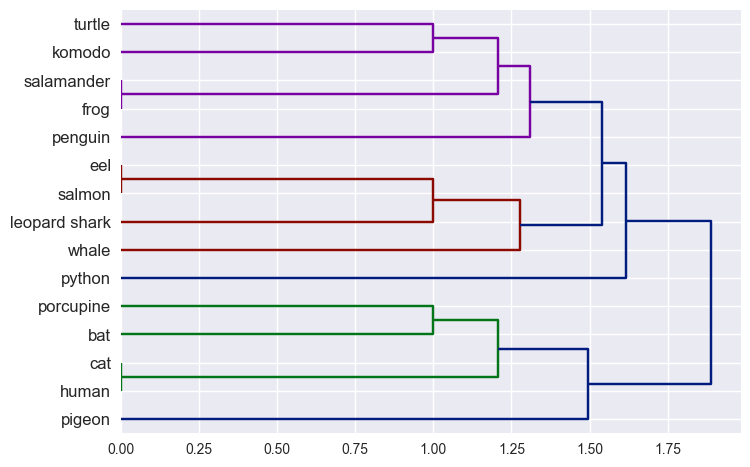

In [36]:
Z = hierarchy.linkage(X.values, 'average')
dn = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')

## 3 Density-Based Clustering

Density-based clustering identifies the individual clusters as high-density regions that are separated by regions of low density. DBScan is one of the most popular density based clustering algorithms. In DBScan, data points are classified into 3 types---core points, border points, and noise points---based on the density of their local neighborhood. The local neighborhood density is defined according to 2 parameters:  radius of neighborhood size (eps) and minimum number of points in the neighborhood (min_samples). 

For this approach, we will use a noisy, 2-dimensional dataset originally created by Karypis et al. [1] for evaluating their proposed CHAMELEON algorithm. The example code shown below will load and plot the distribution of the data.

<Axes: xlabel='x', ylabel='y'>

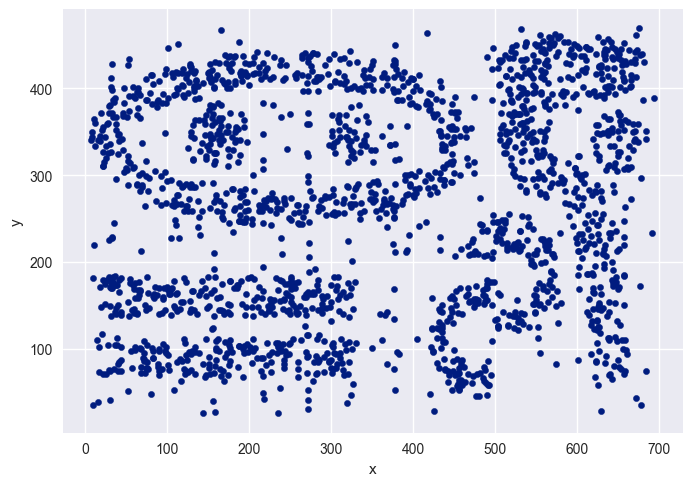

In [37]:
import pandas as pd
data = pd.read_csv('chameleon.data', delimiter=' ', names=['x','y'])
data.plot.scatter(x='x',y='y')

We apply the DBScan clustering algorithm on the data by setting the neighborhood radius (eps) to 15.5 and minimum number of points (min_samples) to be 5. The clusters are assigned to IDs between 0 to 8 while the noise points are assigned to a cluster ID equals to -1.

<Axes: xlabel='x', ylabel='y'>

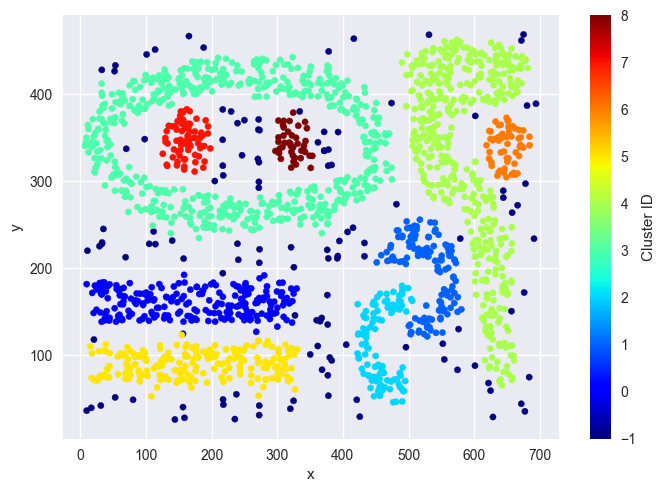

In [38]:
import numpy as np
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=15.5, min_samples=5).fit(data)
labels = pd.DataFrame(db.labels_,columns=['Cluster ID'])
result = pd.concat((data,labels), axis=1)
result.plot.scatter(x='x',y='y',c='Cluster ID', colormap='jet')

## 4 Summary

This tutorial illustrates examples of using different Python's implementation of clustering algorithms. Algorithms such as k-means, spectral clustering, and DBScan are designed to create disjoint partitions of the data whereas the single-link, complete-link, and group average algorithms are designed to generate a hierarchy of cluster partitions.

References:
[1] George Karypis, Eui-Hong Han, and Vipin Kumar. CHAMELEON: A Hierarchical Clustering Algorithm Using Dynamic Modeling. IEEE Computer 32(8): 68-75, 1999.